In [1]:
## NOTE - to run pacmap, it is recommended that one have the following MacOS of version 12.x, where
## dependencies can be installed. 
##
## before executing the code to install pacmap, try typing the following into your terminal:
## export CC=/usr/bin/clang
## export CXX=/usr/bin/clang++

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dimensionality Reduction Packages
import umap # conda install -c conda-forge umap-learn OR pip install umap-learn
#import pacmap #pip install pacmap 
import trimap #pip install trimap
from sklearn.manifold import TSNE

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [3]:
## Load DMS Matrix 
# Load the DMS heatmap csv
AtSW13_average_high_expression_REAL_t = pd.read_csv('AtSW13_average_high_expression_REAL_t.csv')

#Column "Unnamed: 0" contains the AA of the WT. We remove the name of this column as set it as the index 
AtSW13_average_high_expression_REAL_t.rename(columns = {"Unnamed: 0": None}, 
          inplace = True)
AtSW13_average_high_expression_REAL_t=AtSW13_average_high_expression_REAL_t.set_index(None)

In [4]:
## Load Properties of the WT AA 
# Load labels denoting the biophysical of the WT AA (Negative, Positive, Small Alliphatic, etc.)
physicochemical_properties = pd.read_csv('AtSW13_combined_residue_properties_physico_col.csv')
size_properties = pd.read_csv('AtSW13_combined_residue_properties_size_col.csv')
stereoelectronic_properties = pd.read_csv('AtSW13_combined_residue_properties_stereoelectronic_col.csv')
# Combine lables into one dataframe
Labels=pd.concat([physicochemical_properties, size_properties, stereoelectronic_properties], axis=1)

### Dimensionality Reduction

In [5]:
#Data for Dimensionality Reduction (rename the DMS dataframe to df for simplicity)
df=AtSW13_average_high_expression_REAL_t

In [6]:
## COMMENT OUT PaCMAP IF INSTALLATION FAILS
#Dimensionality Reduction Algorithms to test
algorithms = {
    't-SNE': TSNE(),
    'UMAP': umap.UMAP(),
    'TriMAP': trimap.TRIMAP(),
#    'PaCMAP': pacmap.PaCMAP()
}

In [7]:
#Create embeddings for each algorithm & save fitting time
results = {}
for name, algorithm in algorithms.items():
    # Calculate embeddings
    embedding = algorithm.fit_transform(df.values)
    # Store results
    results[name] = {
        'embedding': pd.DataFrame(embedding, columns=['x', 'y'])}

In [8]:
#Extract Embeddings and append labels for each algorithim 
tSNE_embeddings=results['t-SNE']['embedding'] 
tSNE_embeddings_with_labels=tSNE_embeddings.join(Labels)

In [9]:
UMAP_embeddings=results['UMAP']['embedding'] 
UMAP_embeddings_with_labels=UMAP_embeddings.join(Labels)

In [10]:
TriMAP_embeddings=results['TriMAP']['embedding'] 
TriMAP_embeddings_with_labels=TriMAP_embeddings.join(Labels)

In [11]:
## COMMENT OUT PaCMAP IF INSTALLATION FAILS
#PaCMAP_embeddings=results['PaCMAP']['embedding'] 
#PaCMAP_embeddings_with_labels=PaCMAP_embeddings.join(Labels)

### Plotting

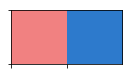

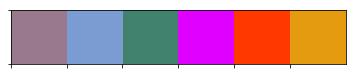

In [12]:
## custom colors!

## Physicochemical colors
#large_ali       = # M
#small_ali       = '#F18181' #A, G, I, L, V
#small_up        = # 
#large_up        =
#large_aro       =
#proline         =
#large_cp        =
#cysteine        = '#85754d'

## Stereoelectronic colors
# https://bestlifeonline.com/obscure-colors/
aliphatic       = '#997a8d'
uncharged_polar = '#7b9cd2' #'#6082b6'
aromatic        = '#40826d'
proline         = '#df00ff'
charged_polar   = '#ff3800'
cysteine        = '#e49b0f'

# Size colors
big             = '#f18181' # '#880808'
small           = '#2d7acc' # '#13294B'


#physico_colors = [large_ali, small_ali, small_up, large_up, large_aro, proline, large_cp, cysteine]
stereoE_colors = [aliphatic, uncharged_polar, aromatic, proline, charged_polar, cysteine]
size_colors = [big, small]
sns.palplot(sns.color_palette(size_colors))
sns.palplot(sns.color_palette(stereoE_colors))

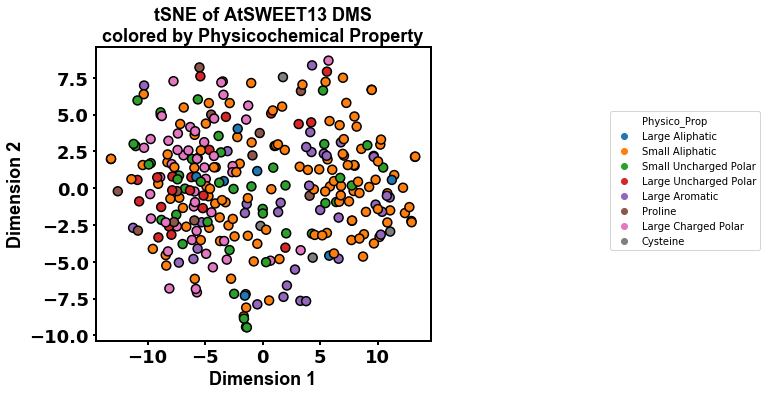

In [30]:
#create boxplot in each subplot
from matplotlib.ticker import MaxNLocator
fig,ax = plt.subplots(1,1,figsize = (6,6))
sc = sns.scatterplot(x='x', y='y', hue='Physico_Prop', data=tSNE_embeddings_with_labels, ax=ax, s=80, edgecolor='black', linewidth=1.5)
for axis in ['top','bottom','left','right']:
    sc.spines[axis].set_linewidth(2)
sc.tick_params(width=2)

plt.title('tSNE of AtSWEET13 DMS\ncolored by Physicochemical Property', fontsize=18, fontname='Arial', fontweight='bold')
plt.xlabel('Dimension 1', fontsize=18, fontname='Arial', fontweight='bold')
plt.ylabel('Dimension 2', fontsize=18, fontname='Arial', fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height *0.1, box.width, box.height * 0.9])
ax.legend(bbox_to_anchor=(2, 0.8), ncol = 1, fancybox=True)
#plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
#plt.show()
plt.savefig('tSNE_physico_spec.png', dpi=600)

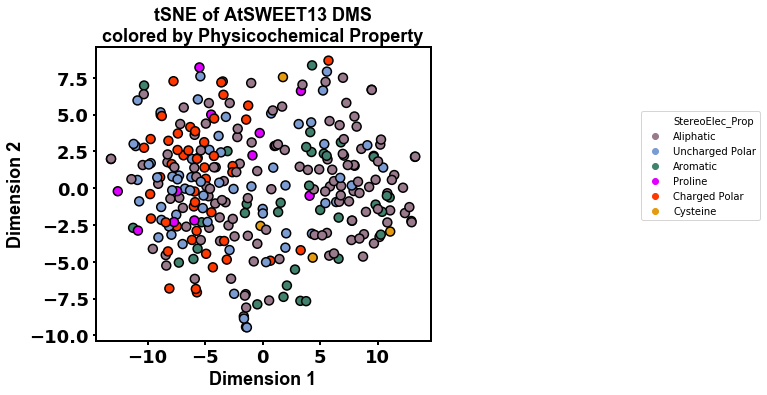

In [31]:
#create boxplot in each subplot
fig,ax = plt.subplots(1,1,figsize = (6,6))
sc = sns.scatterplot(x='x', y='y', hue='StereoElec_Prop', data=tSNE_embeddings_with_labels, ax=ax, s=80, palette=stereoE_colors, edgecolor='black', linewidth=1.5)
for axis in ['top','bottom','left','right']:
    sc.spines[axis].set_linewidth(2)
sc.tick_params(width=2)

plt.title('tSNE of AtSWEET13 DMS\ncolored by Physicochemical Property', fontsize=18, fontname='Arial', fontweight='bold')
plt.xlabel('Dimension 1', fontsize=18, fontname='Arial', fontweight='bold')
plt.ylabel('Dimension 2', fontsize=18, fontname='Arial', fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height *0.1, box.width, box.height * 0.9])
ax.legend(bbox_to_anchor=(2, 0.8), ncol = 1, fancybox=True)
#plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
#plt.show()
plt.savefig('tSNE_physico_hm.png', dpi=600)

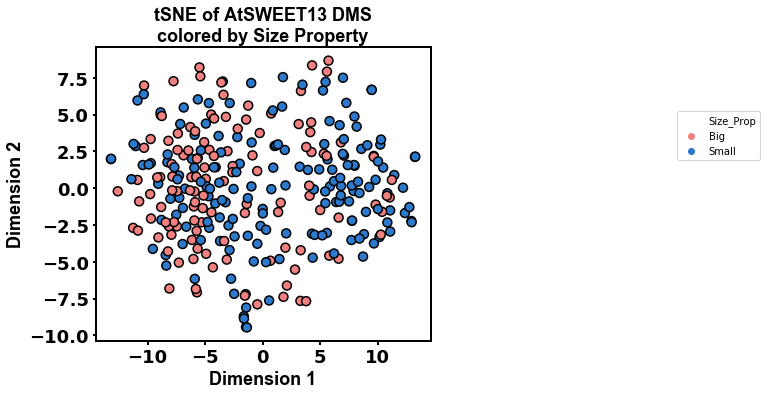

In [32]:
#create boxplot in each subplot
fig,ax = plt.subplots(1,1,figsize = (6,6))
sc = sns.scatterplot(x='x', y='y', hue='Size_Prop', data=tSNE_embeddings_with_labels, ax=ax, s=80, palette=size_colors, edgecolor='black', linewidth=1.5)
for axis in ['top','bottom','left','right']:
    sc.spines[axis].set_linewidth(2)
sc.tick_params(width=2)

#plt.xlim(-15,15)
#plt.ylim(-10,10)

plt.title('tSNE of AtSWEET13 DMS\ncolored by Size Property', fontsize=18, fontname='Arial', fontweight='bold')
plt.xlabel('Dimension 1', fontsize=18, fontname='Arial', fontweight='bold')
plt.ylabel('Dimension 2', fontsize=18, fontname='Arial', fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height *0.1, box.width, box.height * 0.9])
ax.legend(bbox_to_anchor=(2, 0.8), ncol = 1, fancybox=True)
#plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
#plt.show()
plt.savefig('tSNE_size.png', dpi=600)

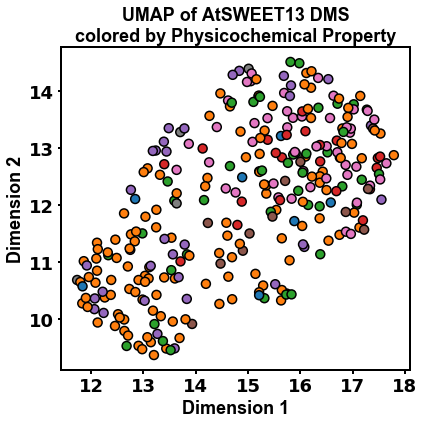

In [16]:
#create boxplot in each subplot
fig,ax = plt.subplots(1,1,figsize = (6,6))
sc = sns.scatterplot(x='x', y='y', hue='Physico_Prop', data=UMAP_embeddings_with_labels, ax=ax, s=80, edgecolor='black', linewidth=1.5)
for axis in ['top','bottom','left','right']:
    sc.spines[axis].set_linewidth(2)
sc.tick_params(width=2)

#plt.xlim(13,21)
#plt.ylim(5,13)

plt.title('UMAP of AtSWEET13 DMS\ncolored by Physicochemical Property', fontsize=18, fontname='Arial', fontweight='bold')
plt.xlabel('Dimension 1', fontsize=18, fontname='Arial', fontweight='bold')
plt.ylabel('Dimension 2', fontsize=18, fontname='Arial', fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')

plt.legend('',frameon=False) #use this to hide the legend
plt.tight_layout()
#plt.show()
plt.savefig('UMAP_physico_spec_2.png', dpi=600)

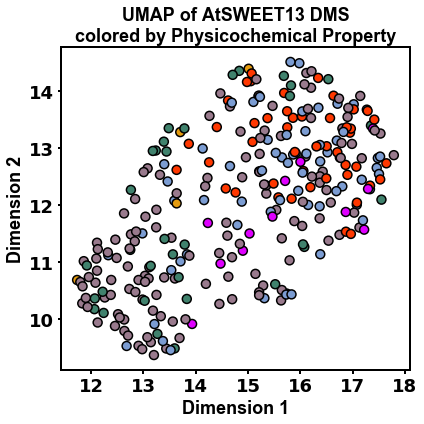

In [17]:
#create boxplot in each subplot
fig,ax = plt.subplots(1,1,figsize = (6,6))
sc = sns.scatterplot(x='x', y='y', hue='StereoElec_Prop', data=UMAP_embeddings_with_labels, ax=ax, s=80, palette=stereoE_colors, edgecolor='black', linewidth=1.5)
for axis in ['top','bottom','left','right']:
    sc.spines[axis].set_linewidth(2)
sc.tick_params(width=2)

#plt.xlim(13,21)
#plt.ylim(5,13)

plt.title('UMAP of AtSWEET13 DMS\ncolored by Physicochemical Property', fontsize=18, fontname='Arial', fontweight='bold')
plt.xlabel('Dimension 1', fontsize=18, fontname='Arial', fontweight='bold')
plt.ylabel('Dimension 2', fontsize=18, fontname='Arial', fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')

plt.legend('',frameon=False) #use this to hide the legend
plt.tight_layout()
#plt.show()
plt.savefig('UMAP_physico_hm_2.png', dpi=600)

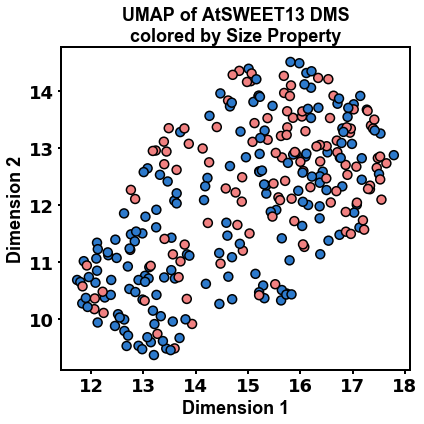

In [18]:
#create boxplot in each subplot
fig,ax = plt.subplots(1,1,figsize = (6,6))
sc = sns.scatterplot(x='x', y='y', hue='Size_Prop', data=UMAP_embeddings_with_labels, ax=ax, s=80, palette=size_colors, edgecolor='black', linewidth=1.5)
for axis in ['top','bottom','left','right']:
    sc.spines[axis].set_linewidth(2)
sc.tick_params(width=2)

#plt.xlim(13,21)
#plt.ylim(5,13)

plt.title('UMAP of AtSWEET13 DMS\ncolored by Size Property', fontsize=18, fontname='Arial', fontweight='bold')
plt.xlabel('Dimension 1', fontsize=18, fontname='Arial', fontweight='bold')
plt.ylabel('Dimension 2', fontsize=18, fontname='Arial', fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')

plt.legend('',frameon=False) #use this to hide the legend
plt.tight_layout()
#plt.show()
plt.savefig('UMAP_size_2.png', dpi=600)

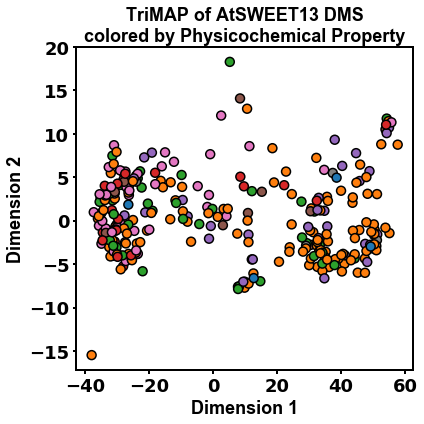

In [19]:
#create boxplot in each subplot ... default marker size is s=40
fig,ax = plt.subplots(1,1,figsize = (6,6))
sc = sns.scatterplot(x='x', y='y', hue='Physico_Prop', data=TriMAP_embeddings_with_labels, ax=ax, s=80, edgecolor='black', linewidth=1.5)
for axis in ['top','bottom','left','right']:
    sc.spines[axis].set_linewidth(2)
sc.tick_params(width=2)

#plt.xlim(13,21)
#plt.ylim(5,13)

plt.title('TriMAP of AtSWEET13 DMS\ncolored by Physicochemical Property', fontsize=18, fontname='Arial', fontweight='bold')
plt.xlabel('Dimension 1', fontsize=18, fontname='Arial', fontweight='bold')
plt.ylabel('Dimension 2', fontsize=18, fontname='Arial', fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')

plt.legend('',frameon=False) #use this to hide the legend
plt.tight_layout()
#plt.show()
plt.savefig('TriMAP_physico_spec_2.png', dpi=600)

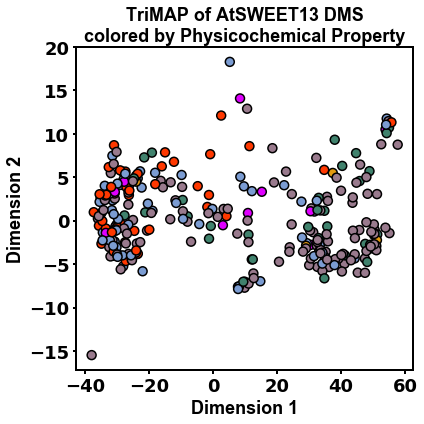

In [20]:
#create boxplot in each subplot
fig,ax = plt.subplots(1,1,figsize = (6,6))
sc = sns.scatterplot(x='x', y='y', hue='StereoElec_Prop', data=TriMAP_embeddings_with_labels, ax=ax, s=80, palette=stereoE_colors, edgecolor='black', linewidth=1.5)
for axis in ['top','bottom','left','right']:
    sc.spines[axis].set_linewidth(2)
sc.tick_params(width=2)

#plt.xlim(13,21)
#plt.ylim(5,13)

plt.title('TriMAP of AtSWEET13 DMS\ncolored by Physicochemical Property', fontsize=18, fontname='Arial', fontweight='bold')
plt.xlabel('Dimension 1', fontsize=18, fontname='Arial', fontweight='bold')
plt.ylabel('Dimension 2', fontsize=18, fontname='Arial', fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')

plt.legend('',frameon=False) #use this to hide the legend
plt.tight_layout()
#plt.show()
plt.savefig('TriMAP_physico_hm_2.png', dpi=600)

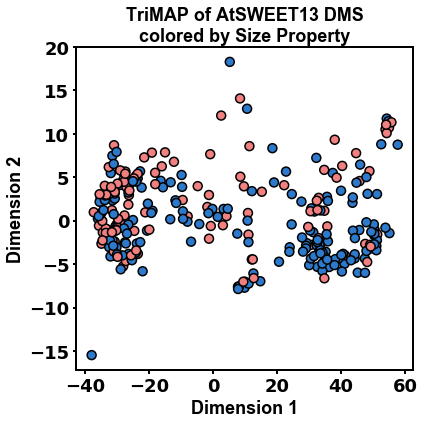

In [21]:
#create boxplot in each subplot
fig,ax = plt.subplots(1,1,figsize = (6,6))
sc = sns.scatterplot(x='x', y='y', hue='Size_Prop', data=TriMAP_embeddings_with_labels, ax=ax, s=80, palette=size_colors, edgecolor='black', linewidth=1.5)
for axis in ['top','bottom','left','right']:
    sc.spines[axis].set_linewidth(2)
sc.tick_params(width=2)

#plt.xlim(13,21)
#plt.ylim(5,13)

plt.title('TriMAP of AtSWEET13 DMS\ncolored by Size Property', fontsize=18, fontname='Arial', fontweight='bold')
plt.xlabel('Dimension 1', fontsize=18, fontname='Arial', fontweight='bold')
plt.ylabel('Dimension 2', fontsize=18, fontname='Arial', fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')

plt.legend('',frameon=False) #use this to hide the legend
plt.tight_layout()
#plt.show()
plt.savefig('TriMAP_size_2.png', dpi=600)

In [ ]:
## COMMENT OUT IF PaCMAP INSTALLATION FAILS
fig,ax = plt.subplots(1,1,figsize = (6,6))
sc = sns.scatterplot(x='x', y='y', hue='Physico_Prop', data=PaCMAP_embeddings_with_labels, ax=ax, s=80, edgecolor='black', linewidth=1.5)
for axis in ['top','bottom','left','right']:
    sc.spines[axis].set_linewidth(2)
sc.tick_params(width=2)

#plt.xlim(13,21)
#plt.ylim(5,13)

plt.title('PaCMAP of AtSWEET13 DMS\ncolored by Physicochemical Property', fontsize=18, fontname='Arial', fontweight='bold')
plt.xlabel('Dimension 1', fontsize=18, fontname='Arial', fontweight='bold')
plt.ylabel('Dimension 2', fontsize=18, fontname='Arial', fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')

plt.legend('',frameon=False) #use this to hide the legend
plt.tight_layout()
#plt.show()
plt.savefig('PaCMAP_physico_spec.png', dpi=600)

In [ ]:
## COMMENT OUT IF PaCMAP INSTALLATION FAILS
fig,ax = plt.subplots(1,1,figsize = (6,6))
sc = sns.scatterplot(x='x', y='y', hue='StereoElec_Prop', data=PaCMAP_embeddings_with_labels, ax=ax, s=80, palette=stereoE_colors, edgecolor='black', linewidth=1.5)
for axis in ['top','bottom','left','right']:
    sc.spines[axis].set_linewidth(2)
sc.tick_params(width=2)

#plt.xlim(13,21)
#plt.ylim(5,13)

plt.title('PaCMAP of AtSWEET13 DMS\ncolored by Physicochemical Property', fontsize=18, fontname='Arial', fontweight='bold')
plt.xlabel('Dimension 1', fontsize=18, fontname='Arial', fontweight='bold')
plt.ylabel('Dimension 2', fontsize=18, fontname='Arial', fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')

plt.legend('',frameon=False) #use this to hide the legend
plt.tight_layout()
#plt.show()
plt.savefig('PaCMAP_physico_hm.png', dpi=600)

NameError: name 'PaCMAP_embeddings_with_labels' is not defined

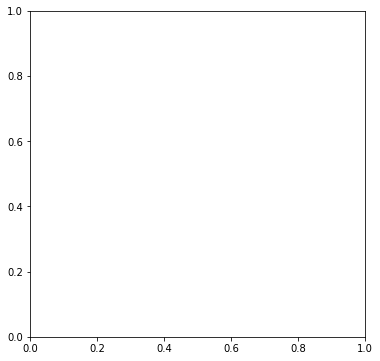

In [208]:
## COMMENT OUT IF PaCMAP INSTALLATION FAILS
fig,ax = plt.subplots(1,1,figsize = (6,6))
sc = sns.scatterplot(x='x', y='y', hue='Size_Prop', data=PaCMAP_embeddings_with_labels, ax=ax, s=80, palette=size_colors, edgecolor='black', linewidth=1.5)
for axis in ['top','bottom','left','right']:
    sc.spines[axis].set_linewidth(2)
sc.tick_params(width=2)

#plt.xlim(-15,15)
#plt.ylim(-10,10)

plt.title('PaCMAP of AtSWEET13 DMS\ncolored by Size Property', fontsize=18, fontname='Arial', fontweight='bold')
plt.xlabel('Dimension 1', fontsize=18, fontname='Arial', fontweight='bold')
plt.ylabel('Dimension 2', fontsize=18, fontname='Arial', fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height *0.1, box.width, box.height * 0.9])
ax.legend(bbox_to_anchor=(2, 0.8), ncol = 1, fancybox=True)
#plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
#plt.show()
plt.savefig('PaCMAP_size.png', dpi=600)